# Import Library & Dataset

In [ ]:
# import library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/dibimbing/Supermart Grocery Sales.csv')

# Data Understanding

In [ ]:
df.head ()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df.shape

(9994, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


# Data Preprocessing

In [ ]:
# Check for duplicate
num_duplicate = df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicate}")

if num_duplicate > 0:
    print("\nDisplaying the first 5 duplicate:")
    display(df[df.duplicated()].head())
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


In [ ]:
# Missing Values
df.isnull().sum() / df.shape[0] * 100

,0
Order ID,0.0
Customer Name,0.0
Category,0.0
Sub Category,0.0
City,0.0
Order Date,0.0
Region,0.0
Sales,0.0
Discount,0.0
Profit,0.0


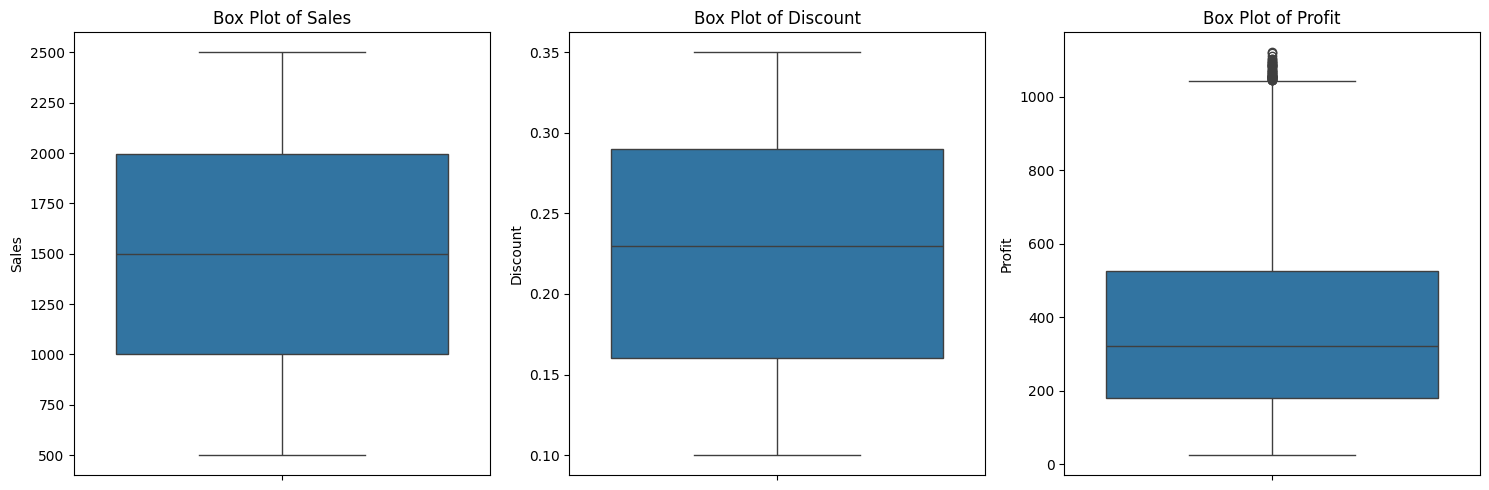

In [ ]:
# check Outliers
numerical_cols = ['Sales', 'Discount', 'Profit']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Data Cleaning

Outliers in 'Profit' capped at the 95th percentile: 847.15


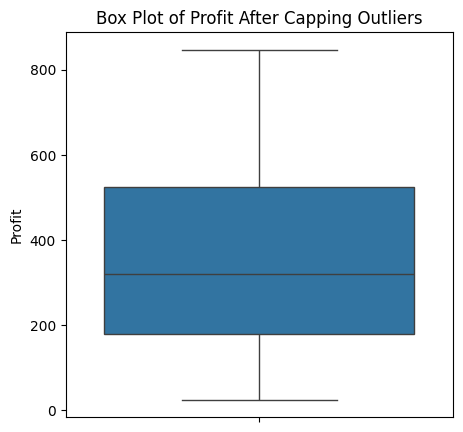

In [ ]:
# Handle outliers in the 'Profit'
profit_95th_percentile = df['Profit'].quantile(0.95)
df['Profit'] = np.where(df['Profit'] > profit_95th_percentile, profit_95th_percentile, df['Profit'])

print(f"Outliers in 'Profit' capped at the 95th percentile: {profit_95th_percentile:.2f}")

# Verify the change by re-plotting the box plot for 'Profit'
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Profit')
plt.title('Box Plot of Profit After Capping Outliers')
plt.show()

## Data Manipulation

In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)

# Display the dataframe
display(df.head())

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.280,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.800,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.200,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.600,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,847.154,Tamil Nadu


In [ ]:
# Calculate the total number of orders per customer
total_orders_by_customer = df.groupby('Customer Name')['Order ID'].nunique().reset_index()
total_orders_by_customer.rename(columns={'Order ID': 'total_orders'}, inplace=True)

# Display the result
display(total_orders_by_customer.head())

,Customer Name,total_orders
0,Adavan,205
1,Aditi,187
2,Akash,196
3,Alan,198
4,Amrish,227


# EDA

Value counts for 'Category':


,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


/tmp/ipython-input-2848933250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


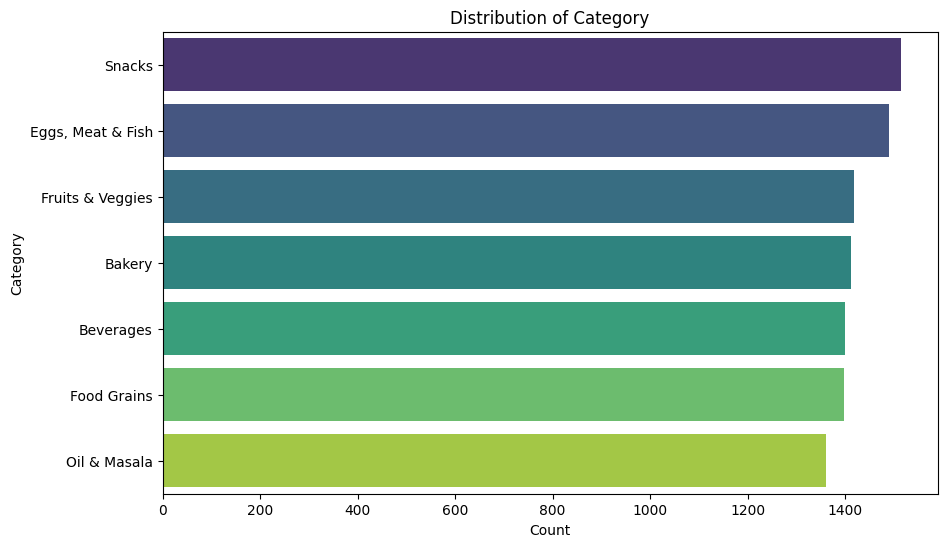

Value counts for 'Sub Category':


,count
Sub Category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499
Noodles,495
Masalas,463
Biscuits,459
Cakes,452


/tmp/ipython-input-2848933250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


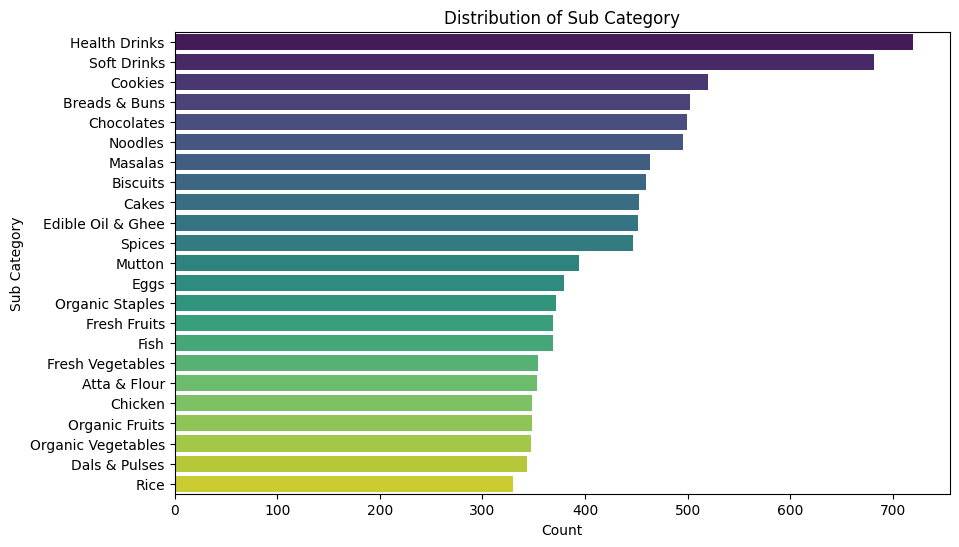

Value counts for 'City':


,count
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


/tmp/ipython-input-2848933250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


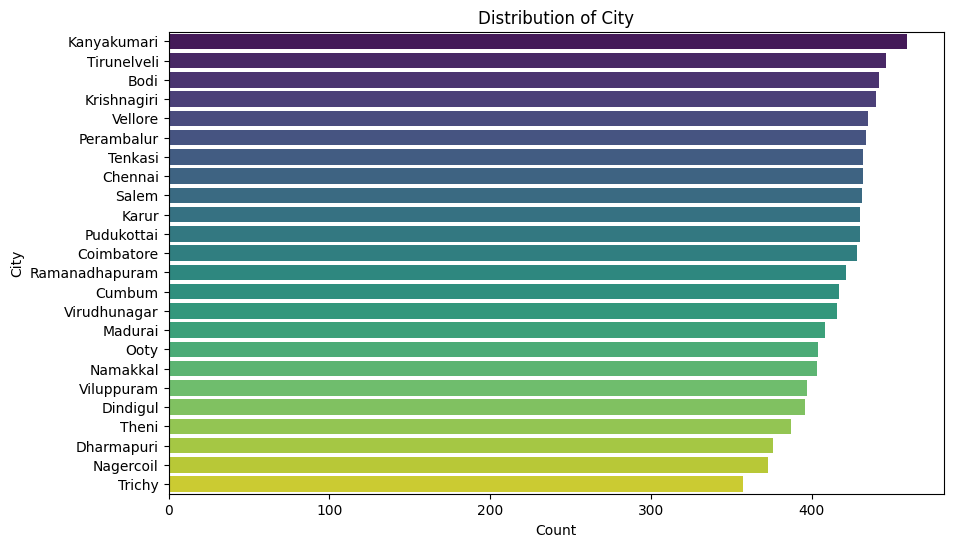

Value counts for 'Region':


,count
Region,
West,3203
East,2848
Central,2323
South,1619
North,1


/tmp/ipython-input-2848933250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


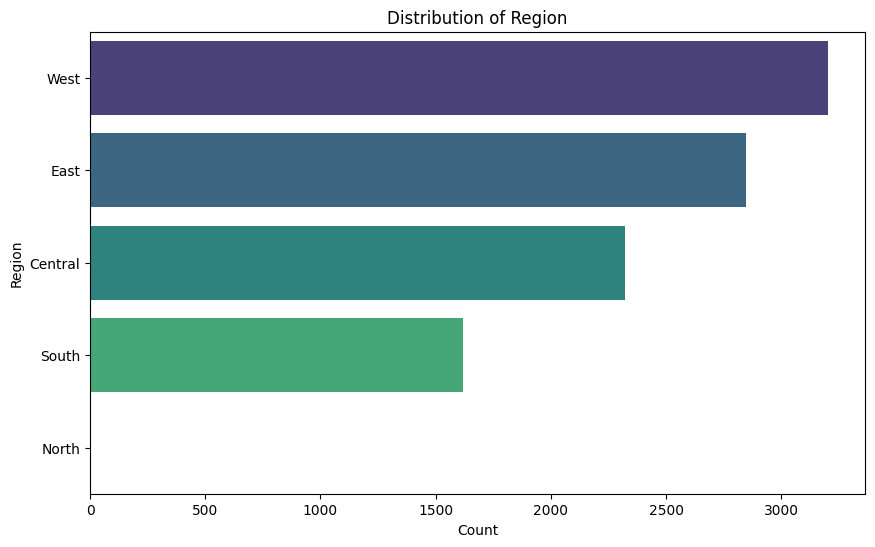

Value counts for 'State':


,count
State,
Tamil Nadu,9994


/tmp/ipython-input-2848933250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


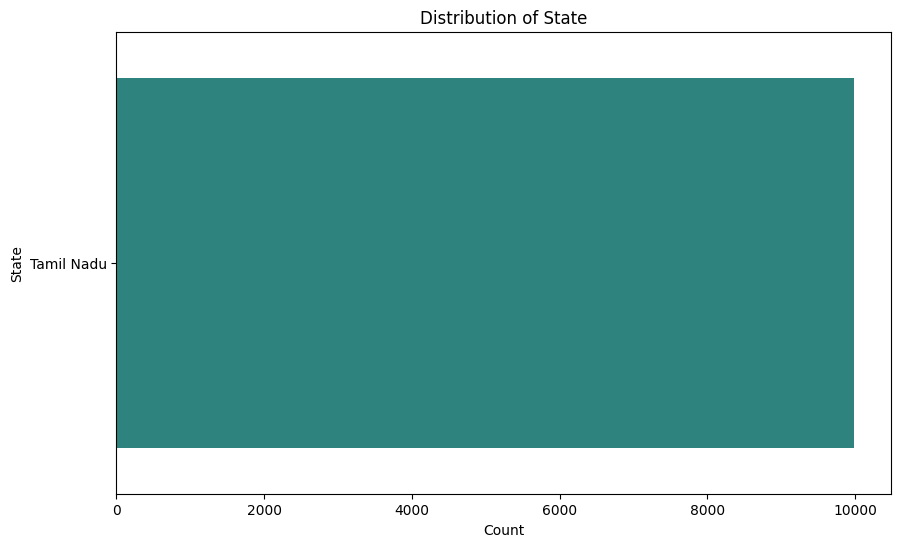

In [ ]:
# Eksplorasi distribusi variabel kategorikal ('Category', 'Sub Category', 'City', 'Region', 'State').
categorical_cols = ['Category', 'Sub Category', 'City', 'Region', 'State']

for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())
    print("\n")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

Top 5 value counts for 'Category':


,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400


/tmp/ipython-input-3395628332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_values.values, y=top_5_values.index, palette='viridis')


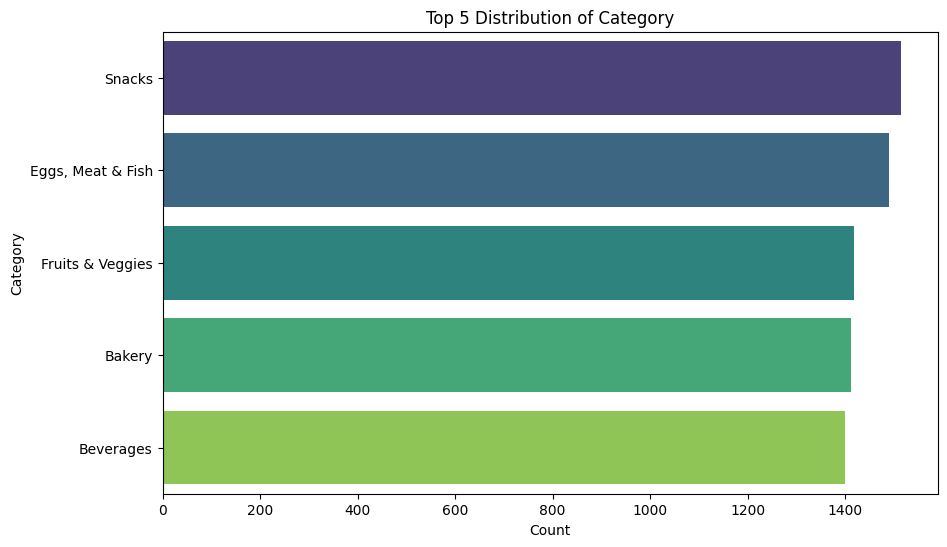

Top 5 value counts for 'Sub Category':


,count
Sub Category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499


/tmp/ipython-input-3395628332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_values.values, y=top_5_values.index, palette='viridis')


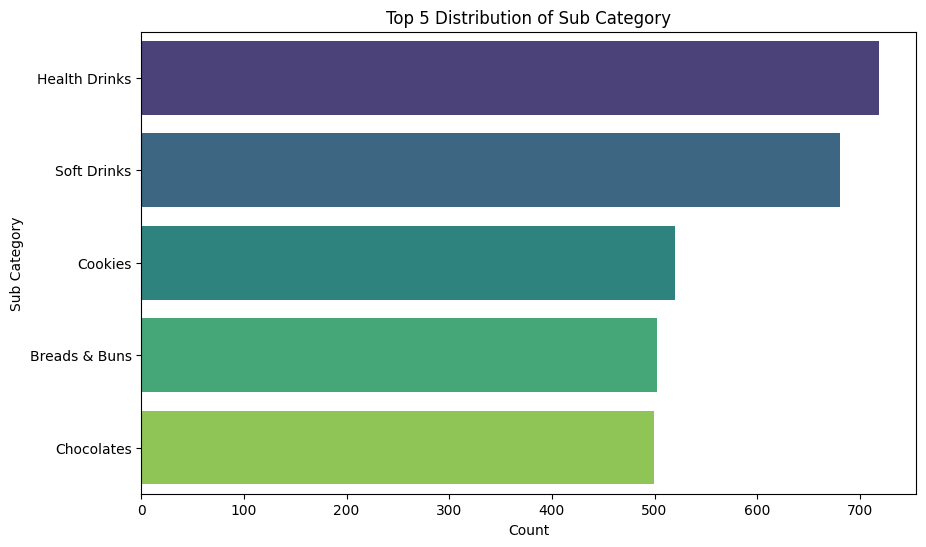

Top 5 value counts for 'City':


,count
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435


/tmp/ipython-input-3395628332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_values.values, y=top_5_values.index, palette='viridis')


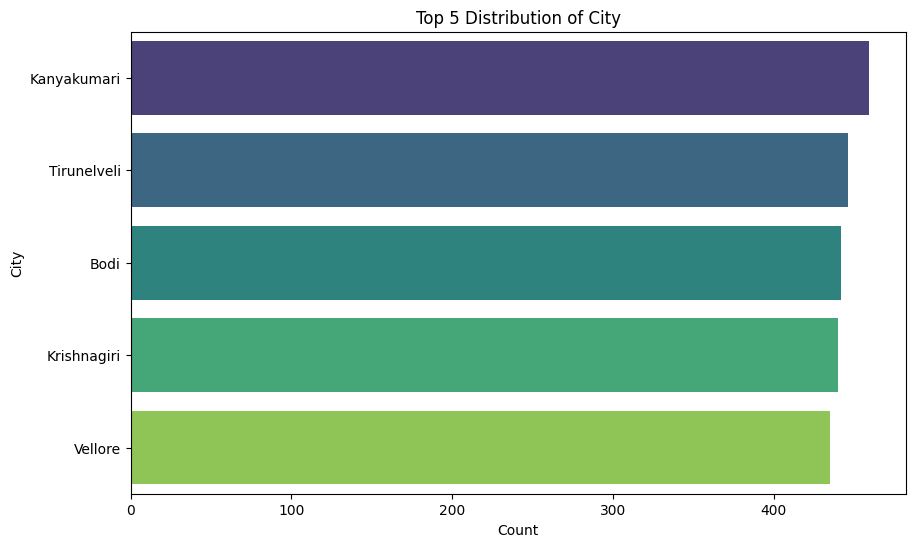

In [ ]:
# Eksplorasi distribusi variabel kategorikal ('Category', 'Sub Category', 'City', 'Region', 'State').
categorical_cols = ['Category', 'Sub Category', 'City']

for col in categorical_cols:
    print(f"Top 5 value counts for '{col}':")
    top_5_values = df[col].value_counts().head(5)
    display(top_5_values)
    print("\n")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_5_values.values, y=top_5_values.index, palette='viridis')
    plt.title(f'Top 5 Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

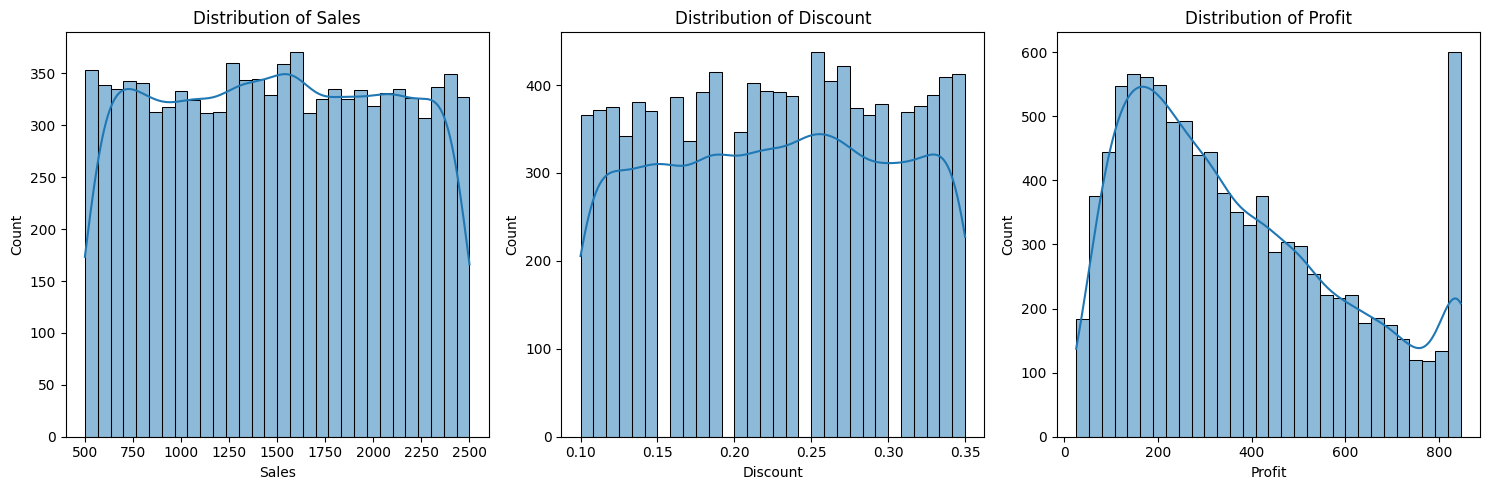

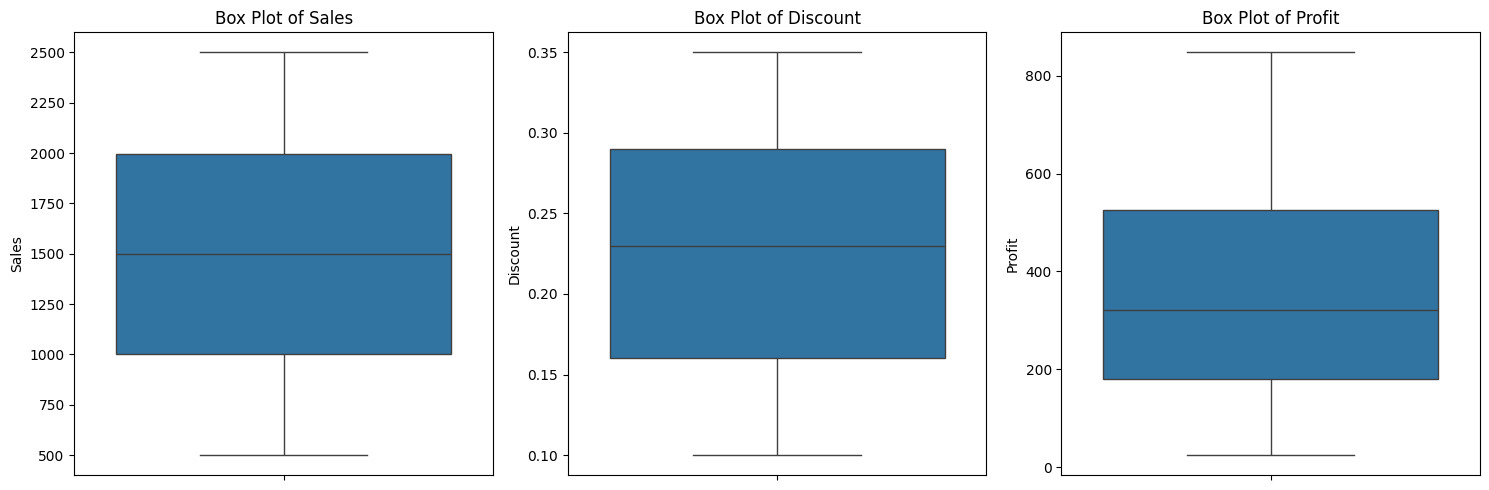

In [ ]:
numerical_cols = ['Sales', 'Discount', 'Profit']
numerical_df = df[numerical_cols]

# Histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=numerical_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=numerical_df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

,Sales,Discount,Profit
Sales,1.000000,-0.005512,0.604917
Discount,-0.005512,1.000000,0.000297
Profit,0.604917,0.000297,1.000000


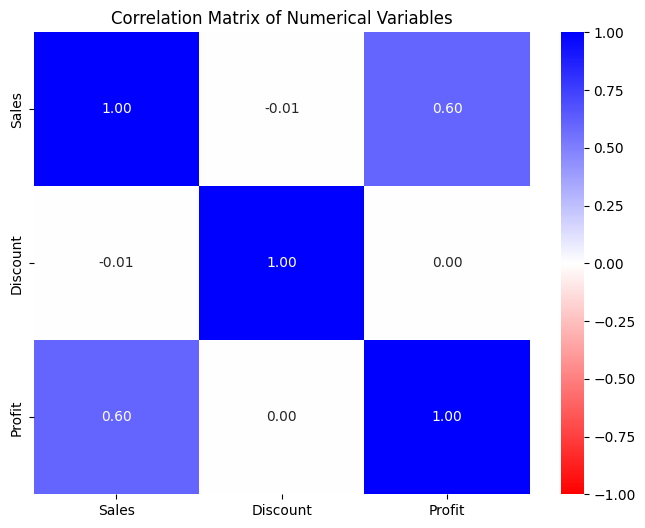

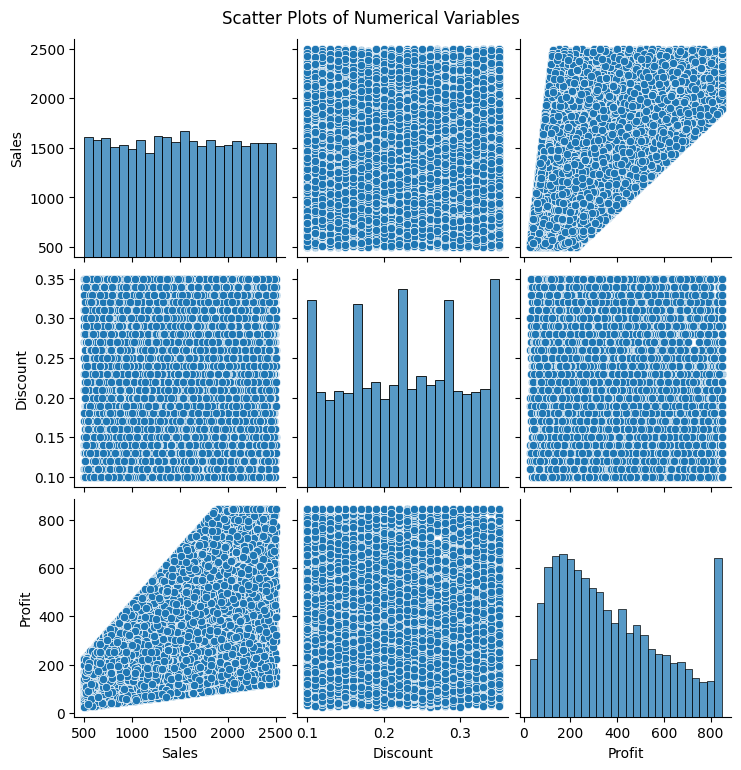

In [ ]:
import matplotlib.colors as mcolors

# Correlation matrix
correlation_matrix = numerical_df.corr()
display(correlation_matrix)

# colormap
colors = ["red", "white", "blue"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", colors)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f",
            vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plots
sns.pairplot(numerical_df)
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)
plt.show()

In [ ]:
num_unique_order_id = df['Order ID'].nunique()
num_unique_customer_name = df['Customer Name'].nunique()
total_rows = df.shape[0]

print(f"Number of unique Order IDs: {num_unique_order_id}")
print(f"Number of unique Customer Names: {num_unique_customer_name}")
print(f"Total number of rows: {total_rows}")

if num_unique_order_id == total_rows:
    print("Each row represents a unique order (Order ID is a unique identifier).")
else:
    print("Order ID is not a unique identifier for each row.")

if num_unique_customer_name < total_rows:
    print("There are fewer unique customer names than total rows, indicating repeat customers.")
else:
    print("The number of unique customer names is equal to the total rows, indicating each row is a unique customer (unlikely).")

Number of unique Order IDs: 9994
Number of unique Customer Names: 50
Total number of rows: 9994
Each row represents a unique order (Order ID is a unique identifier).
There are fewer unique customer names than total rows, indicating repeat customers.


In [ ]:
# Aggregate sales and profit by Category and Sub Category
agg_df = df.groupby(['Category'])[['Sales', 'Profit']].sum().reset_index()

# Display the aggregated data
display(agg_df)

,Category,Sales,Profit
0,Bakery,2112281,521428.542
1,Beverages,2085313,519265.956
2,"Eggs, Meat & Fish",2267401,560150.632
3,Food Grains,2115272,522150.778
4,Fruits & Veggies,2100727,523879.354
5,Oil & Masala,2038442,491745.430
6,Snacks,2237546,560784.618


In [ ]:
# Sort by profit to find low and high profit categories
high_profit = agg_df.sort_values(by='Profit', ascending=False)

print("\Profit Categories:")
display(high_profit)

\Profit Categories:


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-1321320020.py:4: SyntaxWarning: invalid escape sequence '\P'
  print("\Profit Categories:")


,Category,Sales,Profit
6,Snacks,2237546,560784.618
2,"Eggs, Meat & Fish",2267401,560150.632
4,Fruits & Veggies,2100727,523879.354
3,Food Grains,2115272,522150.778
0,Bakery,2112281,521428.542
1,Beverages,2085313,519265.956
5,Oil & Masala,2038442,491745.430


/tmp/ipython-input-2731351467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_high_profit, x='Profit', y='Category', palette='viridis')


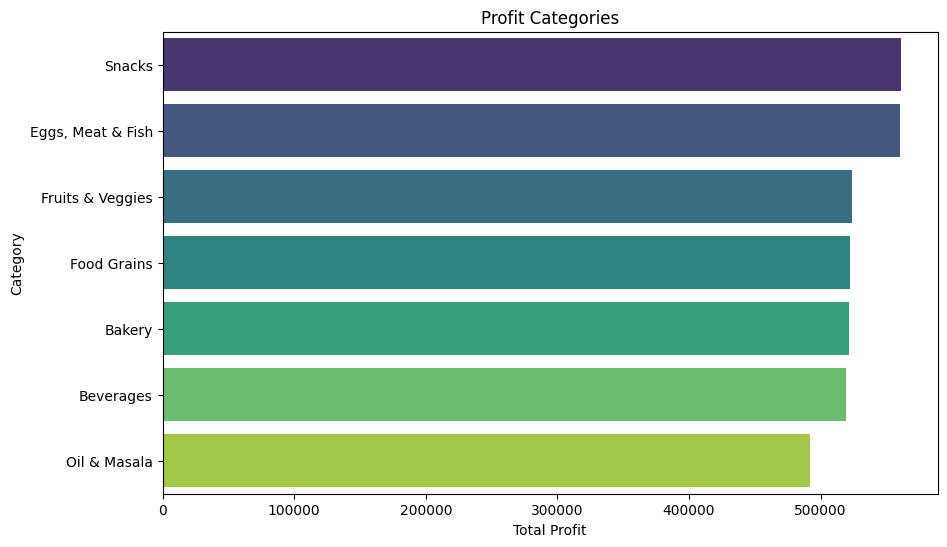

In [ ]:
# Get profit categories
top_3_high_profit = agg_df.sort_values(by='Profit', ascending=False)

# Plot the top 3 high profit categories
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_high_profit, x='Profit', y='Category', palette='viridis')
plt.title('Profit Categories')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()

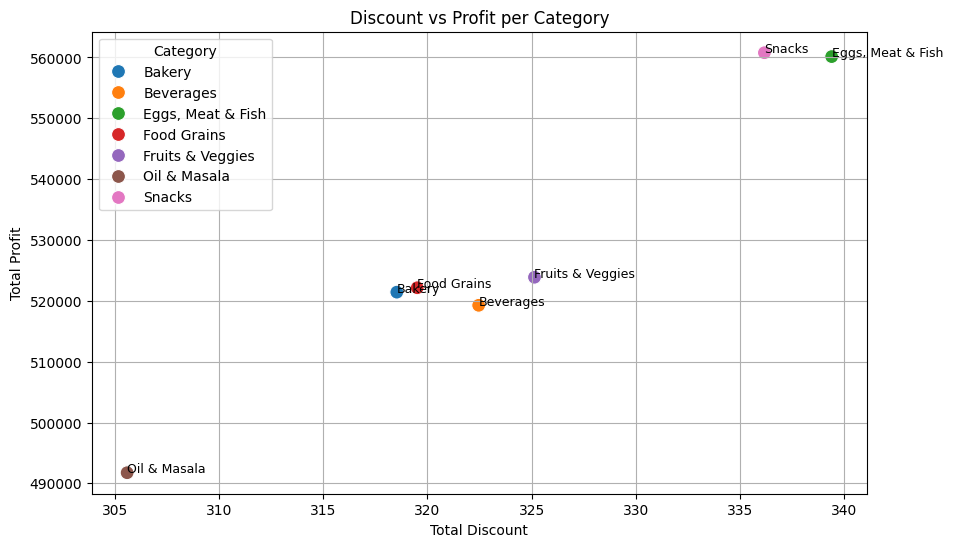

In [ ]:
# Aggregate data by Category to get total Discount and Profit per Category
category_agg_df = df.groupby('Category')[['Discount', 'Profit']].sum().reset_index()

# Create a scatter plot of Discount vs Profit per Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_agg_df, x='Discount', y='Profit', hue='Category', s=100)
plt.title('Discount vs Profit per Category')
plt.xlabel('Total Discount')
plt.ylabel('Total Profit')
plt.grid(True)

# Add labels for each point
for i in range(len(category_agg_df)):
    plt.text(category_agg_df['Discount'][i], category_agg_df['Profit'][i], category_agg_df['Category'][i], fontsize=9)

plt.show()

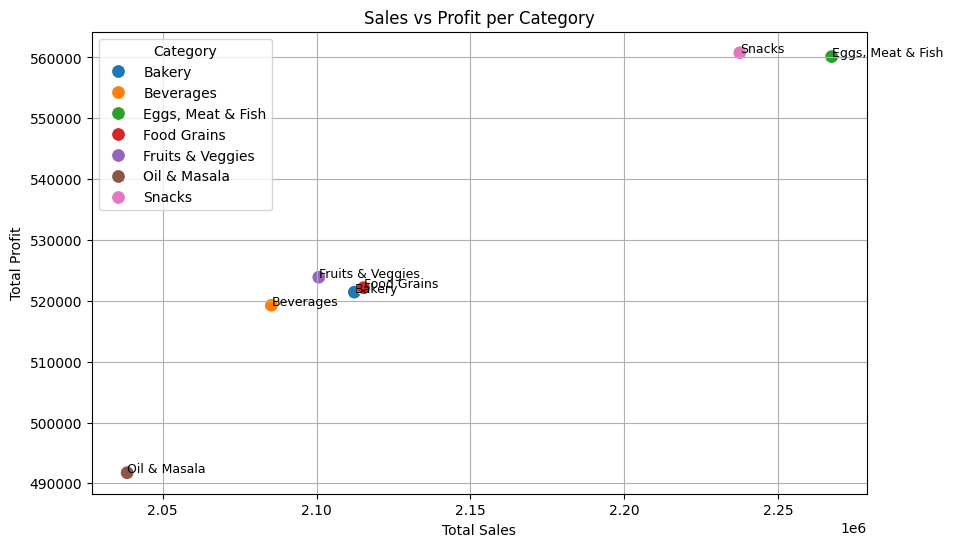

In [ ]:
# Aggregate data by Category to get total Sales and Profit per Category
category_agg_df = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Create a scatter plot of Sales vs Profit per Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_agg_df, x='Sales', y='Profit', hue='Category', s=100)
plt.title('Sales vs Profit per Category')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)

# Add labels for each point
for i in range(len(category_agg_df)):
    plt.text(category_agg_df['Sales'][i], category_agg_df['Profit'][i], category_agg_df['Category'][i], fontsize=9)

plt.show()

In [ ]:
# Extract the year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Aggregate data by year to find total sales, number of customers, and number of transactions
yearly_agg = df.groupby('Year').agg(
    Total_Sales=('Sales', 'sum'),
    Number_of_Customers=('Customer Name', 'nunique'),
    Number_of_Transactions=('Order ID', 'nunique')
).reset_index()

# Sort by Total Sales and display top years
print("Years with Highest Total Sales:")
display(yearly_agg.sort_values(by='Total_Sales', ascending=False).head())

# Sort by Number of Customers and display top years
print("\nYears with Most Purchases by Consumers:")
display(yearly_agg.sort_values(by='Number_of_Customers', ascending=False).head())

# Sort by Number of Transactions and display top years
print("\nYears with Highest Number of Transactions:")
display(yearly_agg.sort_values(by='Number_of_Transactions', ascending=False).head())

Years with Highest Total Sales:


,Year,Total_Sales,Number_of_Customers,Number_of_Transactions
3,2018,4977512,50,3312
2,2017,3871912,50,2587
1,2016,3131959,50,2102
0,2015,2975599,50,1993



Years with Most Purchases by Consumers:


,Year,Total_Sales,Number_of_Customers,Number_of_Transactions
0,2015,2975599,50,1993
1,2016,3131959,50,2102
2,2017,3871912,50,2587
3,2018,4977512,50,3312



Years with Highest Number of Transactions:


,Year,Total_Sales,Number_of_Customers,Number_of_Transactions
3,2018,4977512,50,3312
2,2017,3871912,50,2587
1,2016,3131959,50,2102
0,2015,2975599,50,1993


/tmp/ipython-input-1483657445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_agg, x='Year', y='Total_Sales', palette='viridis')


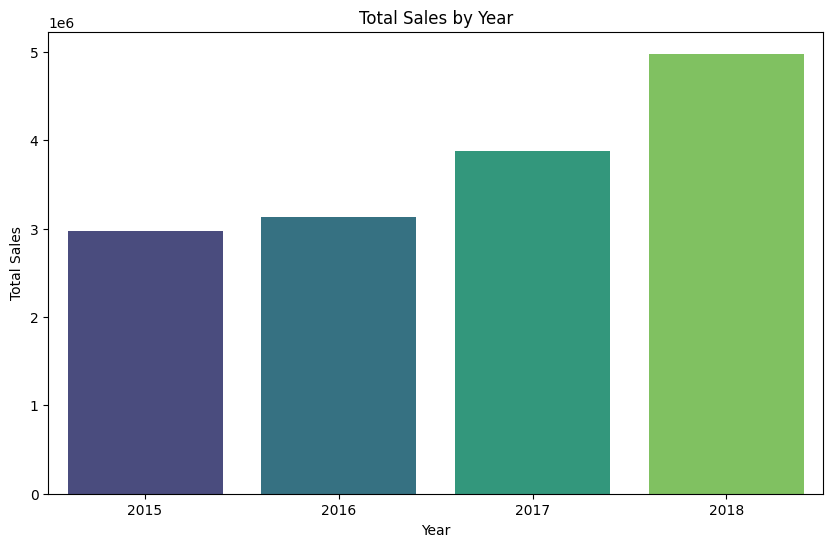

/tmp/ipython-input-1483657445.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_agg, x='Year', y='Number_of_Transactions', palette='viridis')


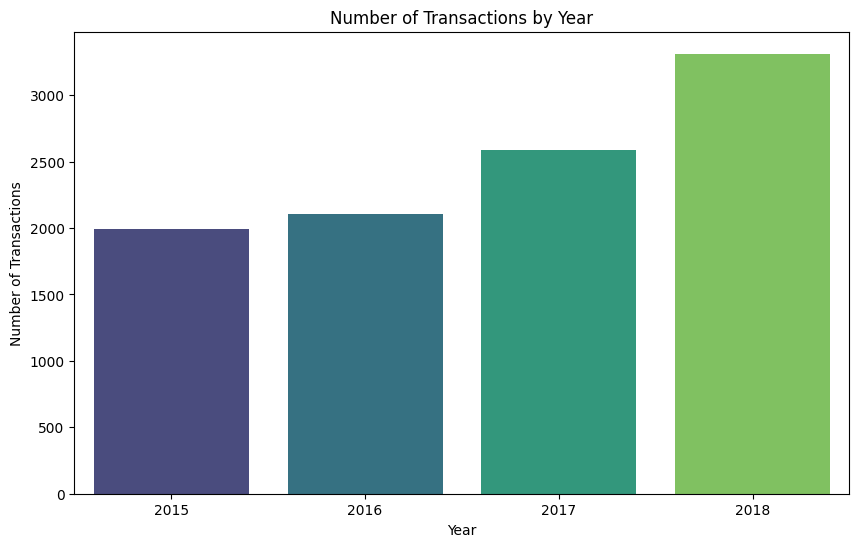

In [ ]:
# Plot Total Sales by Year
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_agg, x='Year', y='Total_Sales', palette='viridis')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


# Plot Number of Transactions by Year
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_agg, x='Year', y='Number_of_Transactions', palette='viridis')
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Aggregate data by year and month
monthly_agg = df.groupby(['Year', 'Month']).agg(
    Total_Sales=('Sales', 'sum'),
    Number_of_Customers=('Customer Name', 'nunique'),
    Number_of_Transactions=('Order ID', 'nunique')
).reset_index()

# Find the month with the highest total sales for each year
print("Month with Highest Total Sales for Each Year:")
display(monthly_agg.loc[monthly_agg.groupby('Year')['Total_Sales'].idxmax()])

# Find the month with the highest number of customers for each year
print("\nMonth with Highest Number of Customers for Each Year:")
display(monthly_agg.loc[monthly_agg.groupby('Year')['Number_of_Customers'].idxmax()])

# Find the month with the highest number of transactions for each year
print("\nMonth with Highest Number of Transactions for Each Year:")
display(monthly_agg.loc[monthly_agg.groupby('Year')['Number_of_Transactions'].idxmax()])

Month with Highest Total Sales for Each Year:


,Year,Month,Total_Sales,Number_of_Customers,Number_of_Transactions
10,2015,11,480979,50,318
22,2016,11,477720,50,324
34,2017,11,551815,50,370
44,2018,9,705680,50,459



Month with Highest Number of Customers for Each Year:


,Year,Month,Total_Sales,Number_of_Customers,Number_of_Transactions
2,2015,3,247156,50,157
20,2016,9,429658,50,293
30,2017,7,315531,50,201
36,2018,1,234739,50,155



Month with Highest Number of Transactions for Each Year:


,Year,Month,Total_Sales,Number_of_Customers,Number_of_Transactions
10,2015,11,480979,50,318
22,2016,11,477720,50,324
34,2017,11,551815,50,370
47,2018,12,687245,50,462


/tmp/ipython-input-3482176471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_agg, x='Month', y='Total_Sales', palette='viridis')


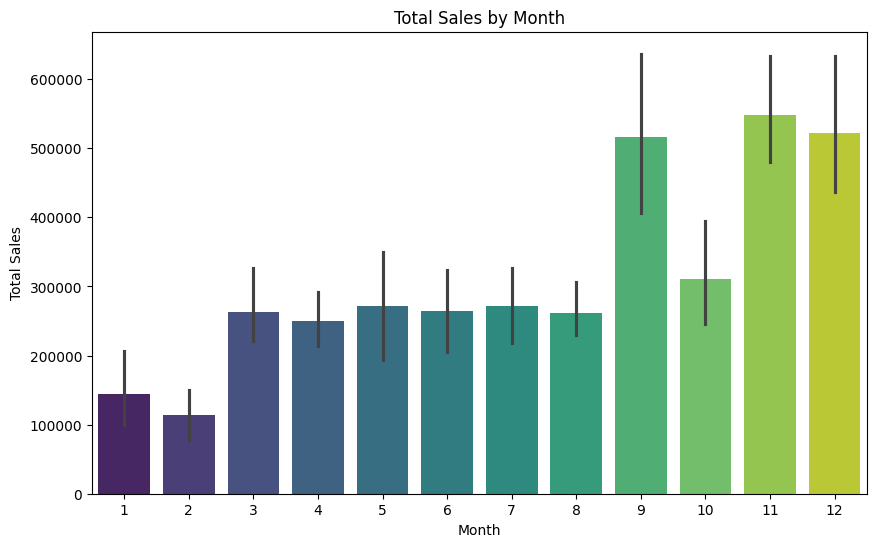

/tmp/ipython-input-3482176471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_agg, x='Month', y='Number_of_Transactions', palette='viridis')


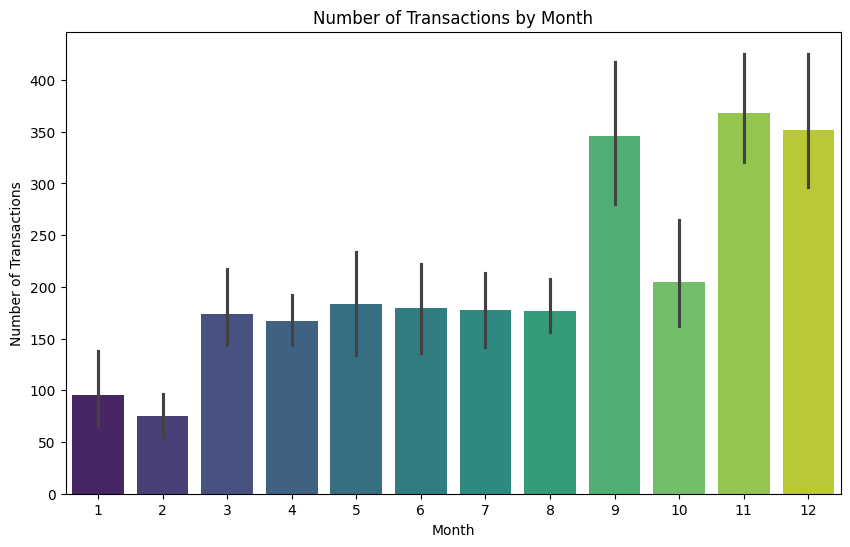

In [ ]:
# Plot Total Sales by Month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_agg, x='Month', y='Total_Sales', palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


# Plot Number of Transactions by Month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_agg, x='Month', y='Number_of_Transactions', palette='viridis')
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Modelling

## Aggregate data by customer


In [ ]:
customer_agg_df = df.groupby('Customer Name').agg(
    total_sales=('Sales', 'sum'),
    total_orders=('Order ID', 'nunique')
).reset_index()

display(customer_agg_df.head())

,Customer Name,total_sales,total_orders
0,Adavan,315341,205
1,Aditi,299674,187
2,Akash,307488,196
3,Alan,294397,198
4,Amrish,333351,227


## Prepare data for modeling


In [ ]:
features = customer_agg_df[['total_sales', 'total_orders']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the scaled features
print("Scaled Features (first 5 rows):")
display(scaled_features[:5])

Scaled Features (first 5 rows):


array([[ 0.94440398,  0.46827736],
       [ 0.03114873, -1.17801024],
       [ 0.48663967, -0.35486644],
       [-0.2764563 , -0.17194559],
       [ 1.99423657,  2.48040665]])

## Apply ML model

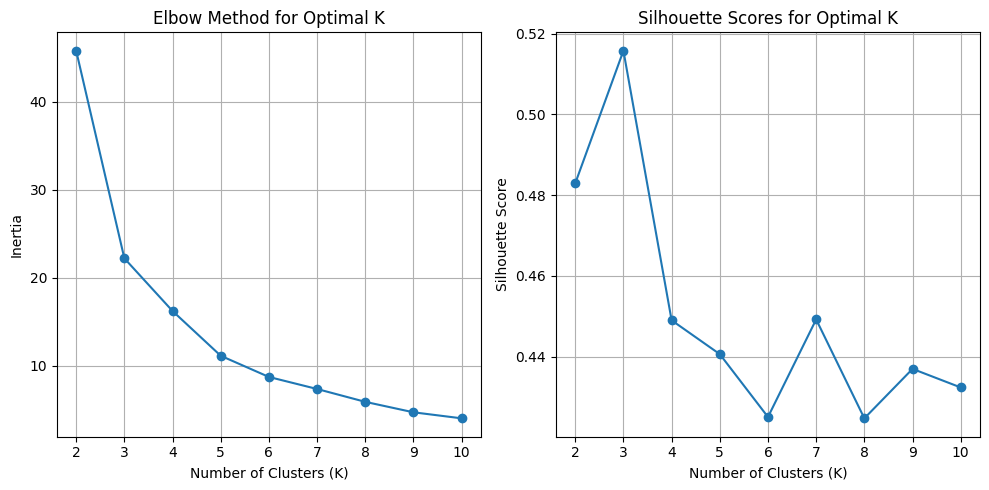

In [ ]:
# Determine the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init explicitly
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the elbow method and silhouette score plots, the optimal number of clusters appears to be 3.



In [ ]:
# Determine the optimal number of clusters (visually from the plots)
optimal_k = 3

# Instantiate KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init explicitly

# Fit the model to the scaled features
kmeans_optimal.fit(scaled_features)

# Add the cluster labels to the customer_agg_df
customer_agg_df['cluster'] = kmeans_optimal.labels_

# Display the first few rows of the dataframe with cluster labels
display(customer_agg_df.head())

,Customer Name,total_sales,total_orders,cluster
0,Adavan,315341,205,0
1,Aditi,299674,187,1
2,Akash,307488,196,0
3,Alan,294397,198,0
4,Amrish,333351,227,2


## Evaluate model


Silhouette Score: 0.52


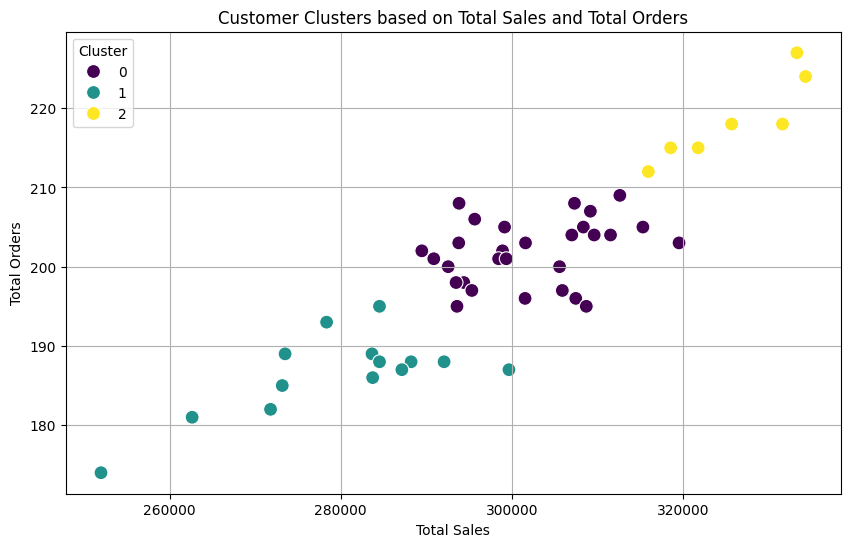

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, customer_agg_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_agg_df, x='total_sales', y='total_orders', hue='cluster', palette='viridis', s=100)
plt.title('Customer Clusters based on Total Sales and Total Orders')
plt.xlabel('Total Sales')
plt.ylabel('Total Orders')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Group by cluster and calculate the required metrics
cluster_analysis = customer_agg_df.groupby('cluster').agg(
    Avg_Total_Sales=('total_sales', 'mean'),
    Avg_Total_Orders=('total_orders', 'mean'),
    Num_Customers=('Customer Name', 'count')
).reset_index()

# Display the cluster summary
display(cluster_analysis)

,cluster,Avg_Total_Sales,Avg_Total_Orders,Num_Customers
0,0,302087.517241,201.827586,29
1,1,279642.000000,186.571429,14
2,2,325922.285714,218.428571,7


In [ ]:
# Print the cluster analysis again for summarizing
print("Summary of each customer cluster:")
display(cluster_analysis)

print("\nCluster 1: Lower Sales/Orders")
print(f"- Average Total Sales: {cluster_analysis.loc[1, 'Avg_Total_Sales']:.2f}")
print(f"- Average Total Orders: {cluster_analysis.loc[1, 'Avg_Total_Orders']:.2f}")
print(f"- Number of Customers: {cluster_analysis.loc[1, 'Num_Customers']}")

print("\nCluster 0: Middle Sales/Orders")
print(f"- Average Total Sales: {cluster_analysis.loc[0, 'Avg_Total_Sales']:.2f}")
print(f"- Average Total Orders: {cluster_analysis.loc[0, 'Avg_Total_Orders']:.2f}")
print(f"- Number of Customers: {cluster_analysis.loc[0, 'Num_Customers']}")

print("\nCluster 2: Higher Sales/Orders")
print(f"- Average Total Sales: {cluster_analysis.loc[2, 'Avg_Total_Sales']:.2f}")
print(f"- Average Total Orders: {cluster_analysis.loc[2, 'Avg_Total_Orders']:.2f}")
print(f"- Number of Customers: {cluster_analysis.loc[2, 'Num_Customers']}")

Summary of each customer cluster:


,cluster,Avg_Total_Sales,Avg_Total_Orders,Num_Customers
0,0,302087.517241,201.827586,29
1,1,279642.000000,186.571429,14
2,2,325922.285714,218.428571,7



Cluster 1: Lower Sales/Orders
- Average Total Sales: 279642.00
- Average Total Orders: 186.57
- Number of Customers: 14

Cluster 0: Middle Sales/Orders
- Average Total Sales: 302087.52
- Average Total Orders: 201.83
- Number of Customers: 29

Cluster 2: Higher Sales/Orders
- Average Total Sales: 325922.29
- Average Total Orders: 218.43
- Number of Customers: 7


# Summary

Kluster 1: Pelanggan dengan Pembelian Rendah :

*   Strategi Up-selling dan Cross-selling
*   Promosikan produk yang populer dan terlaris untuk mendorong pembelian.
*   Program Loyalitas atau Diskon Khusus seperti insentif sederhana seperti diskon 10% atau pengiriman gratis.

Kluster 0: Pelanggan dengan Pembelian Biasa :
*   Kirimkan rekomendasi produk yang dipersonalisasi berdasarkan riwayat pembelian mereka
*   Tawarkan promosi upgrade (misalnya, diskon untuk produk premium atau bundling)
*   Berikan insentif untuk pembelian berikutnya (misalnya, kupon setelah mereka mencapai batas pengeluaran tertentu)

Kluster 2: Pelanggan dengan Pembelian Tinggi
*   Program VIP atau Rewards
*   Berikan akses awal ke produk atau penawaran baru sebelum pelanggan lain
*   Meminta Ulasan dan Masukan,  Ajak mereka untuk memberikan ulasan atau masukan produk.





